In [1]:
from __future__ import absolute_import, division, print_function
import logging, os, sys

# Enable logging
logging.basicConfig(format='[%(levelname)s] %(message)s', level=logging.INFO, stream=sys.stdout)

# Re-import packages if they change
%load_ext autoreload
%autoreload 2

# Recursion Depth
import sys
sys.setrecursionlimit(10000)

# Intialize tqdm to always use the notebook progress bar
import tqdm
tqdm.tqdm = tqdm.tqdm_notebook

# Third-party libraries
import comet_ml
import numpy as np
import pandas as pd
import nilearn.plotting as nip
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import collections
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)
%config InlineBackend.figure_format='retina'  # adapt plots for retina displays
import git


# Project utils

import aneurysm_utils
from aneurysm_utils import evaluation, training,postprocessing,preprocessing
%matplotlib inline


/group/cake/leo/.venv/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


bounding_boxes =postprocessing.bounding_boxes(invidual_labels_test)

for i in range(0,len(bounding_boxes)):
    evaluation.draw_bounding_box(bounding_boxes[i]["candidates"],aneurysm_array=invidual_labels_test[i])

evaluation.draw_bounding_box(bounding_boxes[1]["candidates"],aneurysm_array=invidual_labels_test[1])

import nibabel as nib

image = nib.load("../../../../../data/training/A130_R_labeledMasks.nii.gz").get_fdata()

evaluation.draw_mask_3d(image)

In [2]:
if "workspace" in os.getcwd():
    ROOT = "/workspace"
elif "/group/cake" in os.getcwd(): 
    ROOT = "/group/cake"


In [3]:
env = aneurysm_utils.Environment(project="our-git-project", root_folder=ROOT)
env.cached_data["comet_key"] = "EGrR4luSis87yhHbs2rEaqAWs" 
env.print_info()

Environment Info:

Library Version: 0.1.0
Configured Project: our-git-project

Folder Structure: 
- Root folder: /group/cake
 - Project folder: /group/cake/our-git-project
 - Datasets folder: /data/training
 - Models folder: /group/cake/our-git-project/models
 - Experiments folder: /group/cake/our-git-project/experiments


In [86]:
dataset_params = {
    "prediction": "vessel",
    "mri_data_selection": "", 
    "balance_data": False,
    "seed": 1,
    
    "resample_voxel_dim": None,
    #"resample_size":(93,93,80)
    
}

preprocessing_params = {
    'min_max_normalize': True,
    'mean_std_normalize': False,
    'smooth_img': False, # can contain a number: smoothing factor
    'intensity_segmentation': None
}

from aneurysm_utils.data_collection import load_aneurysm_dataset

df = load_aneurysm_dataset(
    env,
    mri_data_selection=dataset_params["mri_data_selection"],
    random_state=dataset_params["seed"]
)
df.head()

# Load MRI images and split into train, test, and validation
from aneurysm_utils.data_collection import split_mri_images
case_list=["A130_R","A118","A120","A115","A133","A073","A072","A084","A077"]
df = df.loc[df["Case"].isin(case_list)]

train_data, test_data, val_data, _ = split_mri_images(
    env, 
    df, 
    prediction=dataset_params["prediction"], 
    encode_labels=False,
    random_state=dataset_params["seed"],
    balance_data=dataset_params["balance_data"],
    resample_voxel_dim=dataset_params["resample_voxel_dim"],
    #resample_size=dataset_params["resample_size"]
)

images_train, labels_train_aneurysm = train_data
images_test, labels_test_aneurysm = test_data
images_val, labels_val_aneurysm = val_data
# images_train, _ = train_data
# images_test, _= test_data
# images_val, _ = val_data
labels = labels_train_aneurysm+labels_test_aneurysm+labels_val_aneurysm
images = images_train+images_test+images_val

9
8
         Images
-----  --------
All           9
Train         7
Val           1
Test          1



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [88]:
images=preprocessing.min_max_normalize(images)
intensity_filtered=preprocessing.min_max_normalize(preprocessing.intensity_segmentation(images,0.15))


1.0


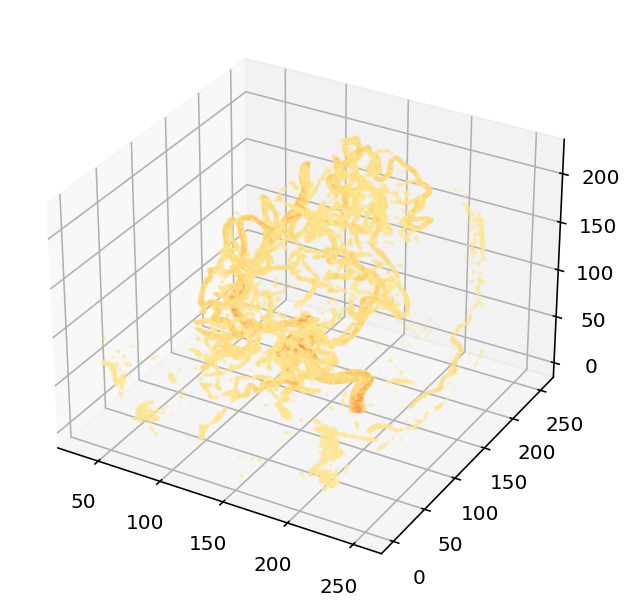

In [58]:
evaluation.draw_image(intensity_filtered[6])

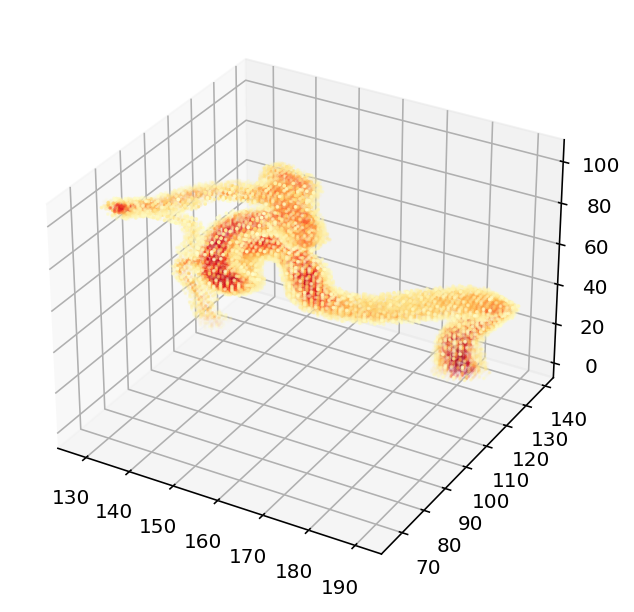

In [89]:

filtered = [label*image for label,image in zip(labels,images)]
evaluation.draw_image(filtered[6])

In [97]:
dataset_params = {
    "prediction": "mask",
    "mri_data_selection": "", 
    "balance_data": False,
    "seed": 1,
    
    "resample_voxel_dim": (1.0,1.0,1.0),
    #"resample_size":(93,93,80)
    
}

preprocessing_params = {
    'min_max_normalize': True,
    'mean_std_normalize': False,
    'smooth_img': False, # can contain a number: smoothing factor
    'intensity_segmentation': None
}

from aneurysm_utils.data_collection import load_aneurysm_dataset

df = load_aneurysm_dataset(
    env,
    mri_data_selection=dataset_params["mri_data_selection"],
    random_state=dataset_params["seed"]
)
df.head()

# Load MRI images and split into train, test, and validation
from aneurysm_utils.data_collection import split_mri_images
case_list=['A064', 'A072', 'A073', 'A077', 'A115', 'A118', 'A120', 'A130_R', 'A133']
df = df.loc[df["Case"].isin(case_list)]

train_data, test_data, val_data, _ = split_mri_images(
    env, 
    df, 
    prediction=dataset_params["prediction"], 
    encode_labels=False,
    random_state=dataset_params["seed"],
    balance_data=dataset_params["balance_data"],
    resample_voxel_dim=dataset_params["resample_voxel_dim"],
    #resample_size=dataset_params["resample_size"]
)

images_train, labels_train_aneurysm = train_data
images_test, labels_test_aneurysm = test_data
images_val, labels_val_aneurysm = val_data
labels = labels_train_aneurysm+labels_test_aneurysm+labels_val_aneurysm
images = images_train+images_test+images_val

9
8
         Images
-----  --------
All           9
Train         7
Val           1
Test          1



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [98]:
images=preprocessing.min_max_normalize(images)
intensity_filtered=preprocessing.intensity_segmentation(images,0.15)

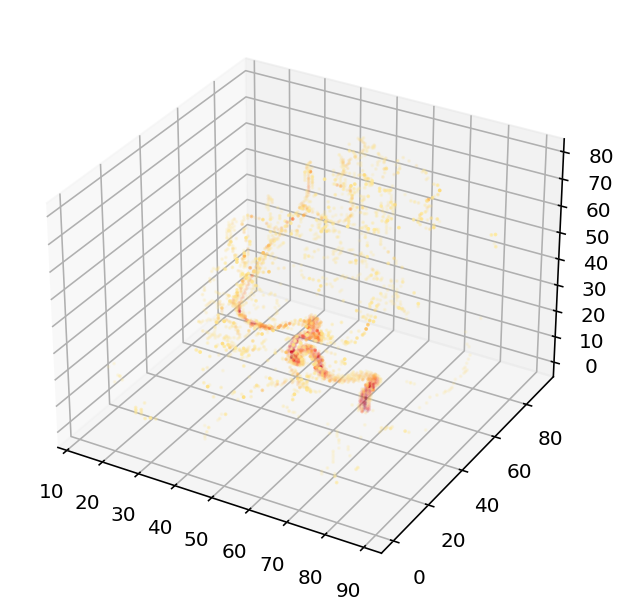

In [68]:
evaluation.draw_image(intensity_filtered[6])

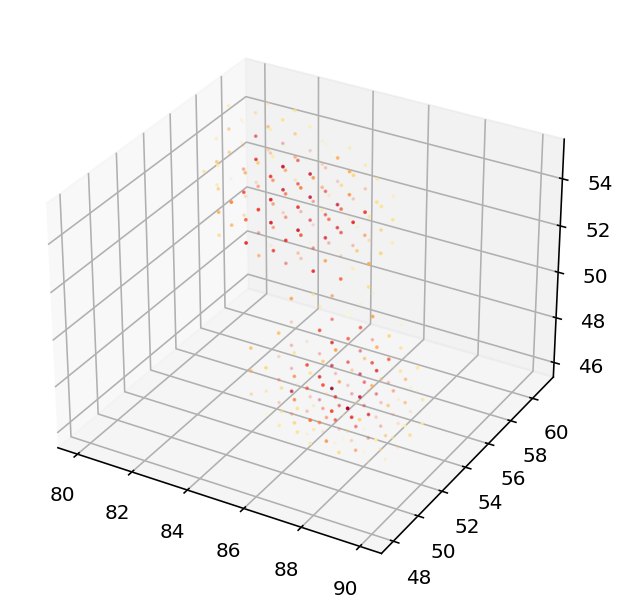

In [100]:

filtered = preprocessing.min_max_normalize([label*image for label,image in zip(labels,images)])
evaluation.draw_image(filtered[6])

In [94]:
upsampled = postprocessing.resample(filtered)
upsampled_orig = postprocessing.resample(images)
#upsampled = preprocessing.min_max_normalize(upsampled)

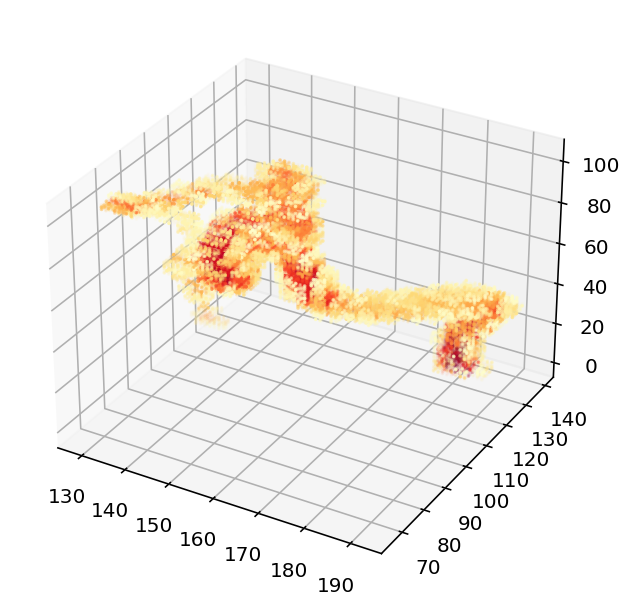

In [95]:
evaluation.draw_image(upsampled[6])

In [82]:
upsampled_orig = postprocessing.resample(intensity_filtered)

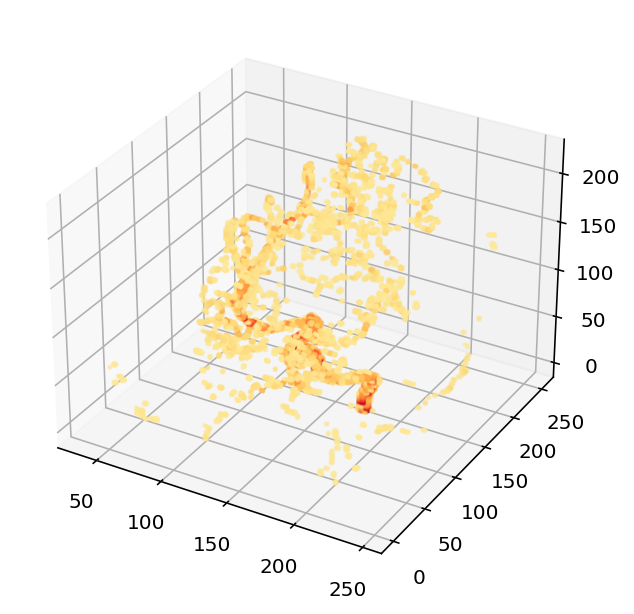

In [84]:
evaluation.draw_image(upsampled_orig[6])